<p>1. Consider any dataset that has more than two class labels. You can create your own or download any publicly available dataset.</p>

<p>(a) Perform K-Medoid++ Clustering selecting the best value of k and taking Euclidean distance as similarity measure. Check your algorithm with the following two conditions.</p>

    i. Maximum number of iterations
    ii. Highest quality of cluster is reached.
    
<p>(b) Perform K-Medoid++ Clustering selecting the best value of k and taking Manhattan distance as similarity measure. Check your algorithm with the following two conditions.</p>

    i. Maximum number of iterations
    ii. Highest quality of cluster is reached.


<b>used dataset link [Mall_Customers.csv]  (https://drive.google.com/file/d/1Ujf--jIwfubdagZO2F3PLdlZqVzNCMKI/view?usp=sharing).

### Importing Libraries

In [1]:
#!pip install scikit-learn-extra

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')

from sklearn_extra.cluster import KMedoids

In [3]:
# Importing the dataset

url = 'https://drive.google.com/file/d/1Ujf--jIwfubdagZO2F3PLdlZqVzNCMKI/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data=pd.read_csv(path)
data.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# checking shape of data
data.shape

(200, 5)

In [5]:
# checking if any null value is there or not
data.isnull().sum()

CustomerID            0
Gender                0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [6]:
# checking data types of each feature
data.dtypes

CustomerID             int64
Gender                object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object

In [7]:
data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
# using only Annual_Income and Spending_Score variable for easy visualisation
X = data.iloc[:, [3, 4]].values

### a. Perform K-Medoid++ Clustering selecting the best value of k and taking Euclidean distance as similarity measure.

Silhouette score for cluster number 2 : 0.39027427770260603
Silhouette score for cluster number 3 : 0.4649831662238108
Silhouette score for cluster number 4 : 0.49134481552180226
Silhouette score for cluster number 5 : 0.553528745455173
Silhouette score for cluster number 6 : 0.5341961128788546
Silhouette score for cluster number 7 : 0.4487050147058354
Silhouette score for cluster number 8 : 0.44803221635168256
Silhouette score for cluster number 9 : 0.45060691438058653
Silhouette score for cluster number 10 : 0.44379613491997055
Silhouette score for cluster number 11 : 0.4262456647229632
Silhouette score for cluster number 12 : 0.4243647736554077
Silhouette score for cluster number 13 : 0.408836628199322
Silhouette score for cluster number 14 : 0.4131344814560785
Silhouette score for cluster number 15 : 0.4196483792002699
best K value:  5


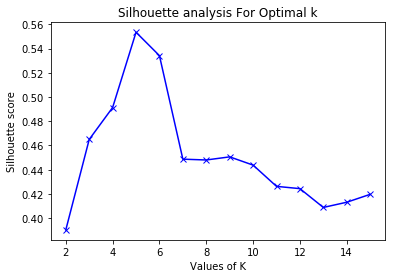

In [9]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
silhouette_avg = []

for num_clusters in range_n_clusters:
    kmedoids = KMedoids(n_clusters=num_clusters, metric='euclidean', method='pam', init='k-medoids++', max_iter=300, random_state=42).fit(X)
    kmedoids_labels = kmedoids.labels_
    
    # silhouette score
    score = silhouette_score(X, labels=kmedoids_labels, metric='euclidean', random_state=42)
    silhouette_avg.append(score)
    print("Silhouette score for cluster number "+str(num_clusters)+" : "+str(score))
    
plt.plot(range_n_clusters,silhouette_avg,"bx-")
#print(silhouette_avg)
k_max = range_n_clusters[silhouette_avg.index(max(silhouette_avg))]
print("best K value: ", k_max)
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

> <b>So, we observed that at K=5 we get maximum Silhouette score as Euclidean distance as similarity measure by k-medoids++<b>

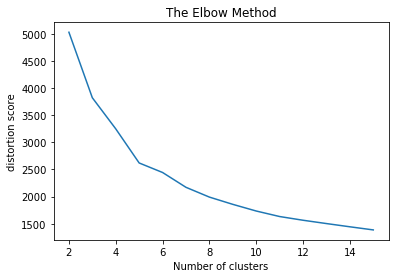

In [10]:
# checking K value by using k-medoids++
cs = []
for i in range(2, 16):
    k_medoids = KMedoids(n_clusters=i, metric='euclidean', method='pam', init='k-medoids++', max_iter=300, random_state=42).fit(X)
    k_medoids_labels = kmedoids.labels_
    cs.append(k_medoids.inertia_)

#print(cs)

plt.plot(range(2, 16), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('distortion score')
plt.show()

> <b>So, we observed that after at K=5 the loss is going to decrease by k-medoids++ using similarity measure as euclidean distance<b>

In [11]:
k_max

5

In [12]:
# using best K

kmedoids = KMedoids(n_clusters=k_max, metric='euclidean', method='pam', init='k-medoids++', max_iter=300, random_state=42).fit(X)
kmedoids_labels = kmedoids.labels_

In [13]:
from sklearn.manifold import TSNE
transform = TSNE

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(X)

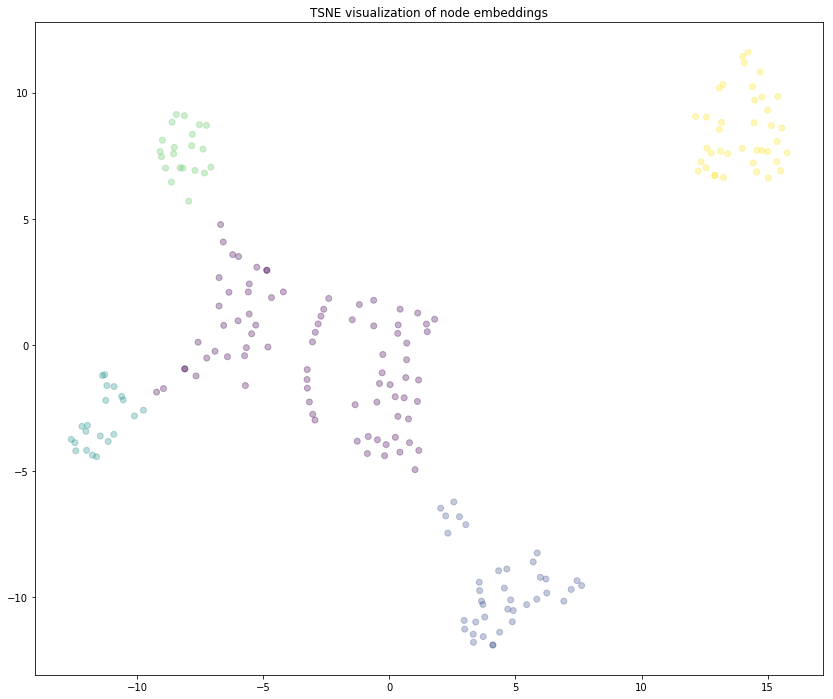

In [14]:
import numpy as np
%matplotlib inline
# draw the points

label_map = { l: i for i, l in enumerate(np.unique(kmedoids_labels))}
node_colours = [ label_map[target] for target in kmedoids_labels]

plt.figure(figsize=(16,12))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1], 
            c=node_colours, alpha=0.3)
plt.title('{} visualization of node embeddings'.format(transform.__name__))

plt.show()

### b. Perform K-Medoid++ Clustering selecting the best value of k and taking Manhattan distance as similarity measure.

Silhouette score for cluster number 2 : 0.3986387486360881
Silhouette score for cluster number 3 : 0.44671131458632024
Silhouette score for cluster number 4 : 0.48467048558685805
Silhouette score for cluster number 5 : 0.5795491814834066
Silhouette score for cluster number 6 : 0.4671613816823427
Silhouette score for cluster number 7 : 0.45038364782166496
Silhouette score for cluster number 8 : 0.4387893989919053
Silhouette score for cluster number 9 : 0.4395560250937674
Silhouette score for cluster number 10 : 0.4413748294016552
Silhouette score for cluster number 11 : 0.4477004780429188
Silhouette score for cluster number 12 : 0.4229441910445199
Silhouette score for cluster number 13 : 0.39646213115502604
Silhouette score for cluster number 14 : 0.3970278007104126
Silhouette score for cluster number 15 : 0.3762288841455259
best K value:  5


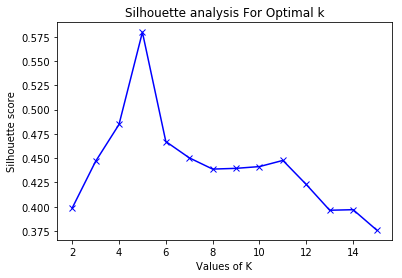

In [15]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
silhouette_avg = []

for num_clusters in range_n_clusters:
    kmedoids = KMedoids(n_clusters=num_clusters, metric='manhattan', method='pam', init='k-medoids++', max_iter=300, random_state=42).fit(X)
    kmedoids_labels = kmedoids.labels_
    
    # silhouette score
    score = silhouette_score(X, labels=kmedoids_labels, metric='manhattan', random_state=42)
    silhouette_avg.append(score)
    print("Silhouette score for cluster number "+str(num_clusters)+" : "+str(score))
    
plt.plot(range_n_clusters,silhouette_avg,"bx-")
#print(silhouette_avg)
k_max = range_n_clusters[silhouette_avg.index(max(silhouette_avg))]
print("best K value: ", k_max)
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

> <b>So, we observed that at K=5 we get maximum Silhouette score as Manhattan distance as similarity measure by k-medoids++<b>

In [16]:
k_max

5

In [17]:
# using best K

kmedoids = KMedoids(n_clusters=k_max, metric='manhattan', method='pam', init='k-medoids++', max_iter=300, random_state=42).fit(X)
kmedoids_labels = kmedoids.labels_

In [18]:
from sklearn.manifold import TSNE
transform = TSNE

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(X)

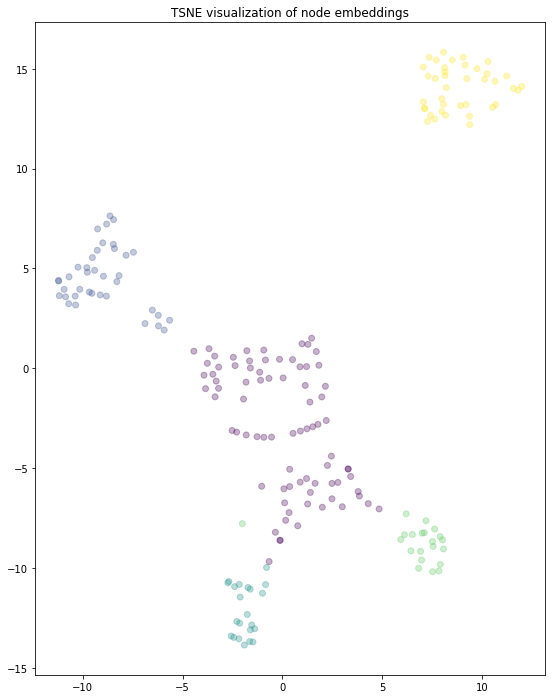

In [19]:
import numpy as np
%matplotlib inline
# draw the points

label_map = { l: i for i, l in enumerate(np.unique(kmedoids_labels))}
node_colours = [ label_map[target] for target in kmedoids_labels]

plt.figure(figsize=(16,12))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1], 
            c=node_colours, alpha=0.3)
plt.title('{} visualization of node embeddings'.format(transform.__name__))

plt.show()